In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.manifold import TSNE

In [2]:
mnist = datasets.fetch_openml(
                    'mnist_784',
                    version=1,
                    as_frame = False
)

In [3]:
X, targets = mnist['data'], mnist['target']

In [4]:
X.shape

(70000, 784)

In [5]:
type(X)

numpy.ndarray

In [6]:
targets.shape

(70000,)

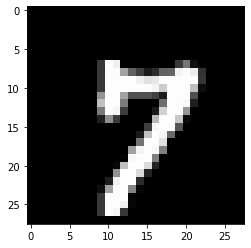

In [37]:
single_image = X[223].reshape(28, 28)
plt.imshow(single_image, cmap = 'gray');

In [8]:
tsne = TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(X[:3000, :])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [9]:
transformed_data.shape

(3000, 2)

In [10]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns = ['x', 'y', 'targets']
)

In [11]:
tsne_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   x        3000 non-null   object
 1   y        3000 non-null   object
 2   targets  3000 non-null   object
dtypes: object(3)
memory usage: 70.4+ KB


In [12]:
tsne_df['targets'] = tsne_df['targets'].astype('int')

In [13]:
tsne_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   x        3000 non-null   object
 1   y        3000 non-null   object
 2   targets  3000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 70.4+ KB


In [14]:
tsne_df.head()

,x,y,targets
0,31.722771,-16.391663,5
1,10.61294,-67.804901,0
2,49.593014,38.388294,4
3,-37.81451,32.660255,1
4,22.104887,31.574816,9


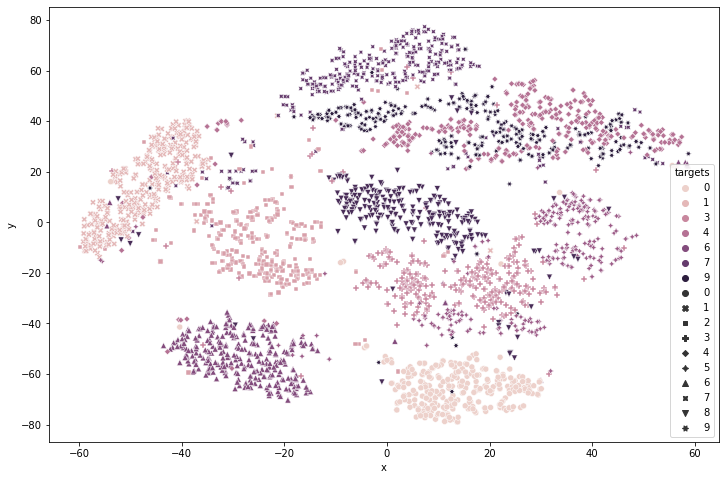

In [15]:
# plot the tsne dataframe

plt.figure(figsize = (12, 8))
sns.scatterplot(data = tsne_df, x = 'x', y = 'y', hue = 'targets', style = 'targets');

In [17]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], targets[:60000], targets[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [18]:
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [19]:
from sklearn.linear_model import SGDClassifier

In [20]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)

SGDClassifier()

In [21]:
y_pred = sgd_model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

In [23]:
accuracy_score(y_test, y_pred)

0.8886

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       980
           1       0.97      0.97      0.97      1135
           2       0.89      0.88      0.89      1032
           3       0.88      0.83      0.85      1010
           4       0.86      0.94      0.90       982
           5       0.91      0.75      0.82       892
           6       0.93      0.94      0.93       958
           7       0.91      0.90      0.90      1028
           8       0.73      0.89      0.80       974
           9       0.90      0.80      0.85      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


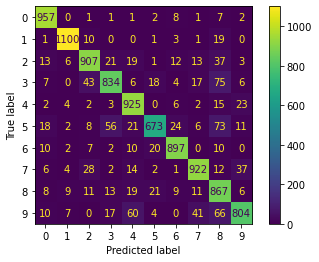

In [25]:
plot_confusion_matrix(sgd_model, X_test, y_test)